In [42]:
# Proposed Algorithm 
import numpy as np
import pandas as pd
data1 = pd.read_csv("D:\\Data\\diabetes.csv")
data = pd.read_csv("D:\\Data\\diabetes.csv")

for column in data.columns:
    if column != "Outcome":
        median = data[column].median()

        data[column] = np.where(data[column] == 0, median, data[column])

print(data)

# Calculate the correlation of each feature with the "Outcome" column

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0     30.5  33.6   
1            1.0     85.0           66.0           29.0     30.5  26.6   
2            8.0    183.0           64.0           23.0     30.5  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            3.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0     30.5  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0           23.0     30.5  30.1   
767          1.0     93.0           70.0           31.0     30.5  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0        1  
1                

In [43]:
from sklearn.preprocessing import StandardScaler

correlation_with_outcome = data.drop("Outcome", axis=1).corrwith(data["Outcome"])
print("Correlation with Outcome:")
print(correlation_with_outcome)


Correlation with Outcome:
Pregnancies                 0.245466
Glucose                     0.492782
BloodPressure               0.165723
SkinThickness               0.189065
Insulin                     0.148457
BMI                         0.312249
DiabetesPedigreeFunction    0.173844
Age                         0.238356
dtype: float64


In [44]:
correlation_with_outcome = correlation_with_outcome.sort_values(ascending=False)
print("Correlation with Outcome (Descending Order):")
print(correlation_with_outcome)


Correlation with Outcome (Descending Order):
Glucose                     0.492782
BMI                         0.312249
Pregnancies                 0.245466
Age                         0.238356
SkinThickness               0.189065
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Insulin                     0.148457
dtype: float64


In [45]:
import pandas as pd
import numpy as np
from scipy import stats

skewness = data.apply(lambda x: stats.skew(x))

threshold = 0.2  

# Categorize features as normal, left-skewed, or right-skewed
normal_features = skewness[abs(skewness) <= threshold].index
left_skewed_features = skewness[skewness < -threshold].index
right_skewed_features = skewness[skewness > threshold].index

print("Skewness of Features:")
print(skewness)

print("\nClassification of Features:")
print("Normal Features:")
print(normal_features)
print("\nLeft-Skewed Features:")
print(left_skewed_features)
print("\nRight-Skewed Features:")
print(right_skewed_features)


Skewness of Features:
Pregnancies                 1.109622
Glucose                     0.534541
BloodPressure               0.141608
SkinThickness               1.220667
Insulin                     2.687918
BMI                         0.599884
DiabetesPedigreeFunction    1.916159
Age                         1.127389
Outcome                     0.633776
dtype: float64

Classification of Features:
Normal Features:
Index(['BloodPressure'], dtype='object')

Left-Skewed Features:
Index([], dtype='object')

Right-Skewed Features:
Index(['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


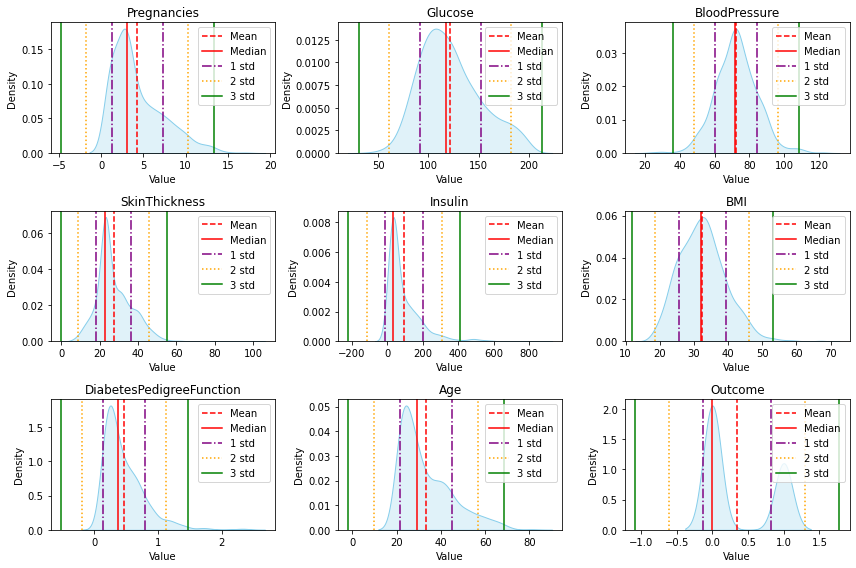

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)

variables = data[:-1]  

for i, variable in enumerate(variables):
    ax = axes[i // 3, i % 3]
    sns.kdeplot(data[variable], color='skyblue', fill=True, ax=ax)
    mean = data[variable].mean()
    median = data[variable].median()
    std = data[variable].std()
    ax.axvline(x=mean, color='red', linestyle='--', label='Mean')
    ax.axvline(x=median, color='red', linestyle='-', label='Median')
    ax.axvline(x=mean - std, color='purple', linestyle='-.', label='1 std')
    ax.axvline(x=mean + std, color='purple', linestyle='-.')
    ax.axvline(x=mean - 2*std, color='orange', linestyle=':', label='2 std')
    ax.axvline(x=mean + 2*std, color='orange', linestyle=':')
    ax.axvline(x=mean - 3*std, color='green', linestyle='-', label='3 std')
    ax.axvline(x=mean + 3*std, color='green', linestyle='-')
    ax.set_title(variable)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.legend()

plt.tight_layout()
plt.show()


In [47]:
mean_glucose = data["Glucose"].mean()
std_glucose = data["Glucose"].std()

# Filter values less than mean + std for Age column
data = data[data['Glucose'] <= mean_glucose + (2.5* std_glucose)]
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0     30.5  33.6   
1            1.0     85.0           66.0           29.0     30.5  26.6   
2            8.0    183.0           64.0           23.0     30.5  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            3.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0     30.5  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0           23.0     30.5  30.1   
767          1.0     93.0           70.0           31.0     30.5  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0        1  
1                

In [48]:
mean_bmi = data["BMI"].mean()
std_bmi = data["BMI"].std()

data = data[(data["BMI"] >= mean_bmi - 3 * std_bmi) & (data["BMI"] <= mean_bmi + 3 * std_bmi)]

print("Modified Dataset:")
print(data)

Modified Dataset:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0     30.5  33.6   
1            1.0     85.0           66.0           29.0     30.5  26.6   
2            8.0    183.0           64.0           23.0     30.5  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            3.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0     30.5  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0           23.0     30.5  30.1   
767          1.0     93.0           70.0           31.0     30.5  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0        1  

In [49]:
preg_mean = data['Pregnancies'].mean()
preg_std = data['Pregnancies'].std()

# Filter values less than mean + std for Pregnancies column
data = data[data['Pregnancies'] <= preg_mean + (2.5 * preg_std)]

print("Modified Dataset:")
print(data)


Modified Dataset:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0     30.5  33.6   
1            1.0     85.0           66.0           29.0     30.5  26.6   
2            8.0    183.0           64.0           23.0     30.5  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            3.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0     30.5  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0           23.0     30.5  30.1   
767          1.0     93.0           70.0           31.0     30.5  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0        1  

In [50]:
age_mean = data['Age'].mean()
age_std = data['Age'].std()

# Filter values less than mean + std for Age column
data = data[data['Age'] <= age_mean + (2.5* age_std)]

print("Modified Dataset:")
print(data)


Modified Dataset:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0     30.5  33.6   
1            1.0     85.0           66.0           29.0     30.5  26.6   
2            8.0    183.0           64.0           23.0     30.5  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            3.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
762          9.0     89.0           62.0           23.0     30.5  22.5   
764          2.0    122.0           70.0           27.0     30.5  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0           23.0     30.5  30.1   
767          1.0     93.0           70.0           31.0     30.5  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0        1  

In [51]:
skin_mean = data['SkinThickness'].mean()
skin_std = data['SkinThickness'].std()

# Filter values less than mean + std for Age column
data = data[data['SkinThickness'] <= skin_mean + (2.5* skin_std)]

print("Modified Dataset:")
print(data)


Modified Dataset:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0     30.5  33.6   
1            1.0     85.0           66.0           29.0     30.5  26.6   
2            8.0    183.0           64.0           23.0     30.5  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            3.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
762          9.0     89.0           62.0           23.0     30.5  22.5   
764          2.0    122.0           70.0           27.0     30.5  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0           23.0     30.5  30.1   
767          1.0     93.0           70.0           31.0     30.5  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0        1  

In [52]:
dp_mean = data['DiabetesPedigreeFunction'].mean()
dp_std = data['DiabetesPedigreeFunction'].std()

# Filter values less than mean + std for SkinThickness column
data = data[data['DiabetesPedigreeFunction'] <= dp_mean + (2.5*dp_std)]

print("Modified Dataset:")
print(data)


Modified Dataset:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0     30.5  33.6   
1            1.0     85.0           66.0           29.0     30.5  26.6   
2            8.0    183.0           64.0           23.0     30.5  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
5            5.0    116.0           74.0           23.0     30.5  25.6   
..           ...      ...            ...            ...      ...   ...   
762          9.0     89.0           62.0           23.0     30.5  22.5   
764          2.0    122.0           70.0           27.0     30.5  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0           23.0     30.5  30.1   
767          1.0     93.0           70.0           31.0     30.5  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0        1  

In [53]:
bp_mean = data["BloodPressure"].mean()
bp_std = data["BloodPressure"].std()

# Remove values beyond 3 standard deviations for Glucose column
data = data[(data["BloodPressure"] >= bp_mean - 3 * bp_std) & (data["BloodPressure"] <= bp_mean + 3 * bp_std)]
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,30.5,26.6,0.351,31.0,0
2,8.0,183.0,64.0,23.0,30.5,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
5,5.0,116.0,74.0,23.0,30.5,25.6,0.201,30.0,0
...,...,...,...,...,...,...,...,...,...
762,9.0,89.0,62.0,23.0,30.5,22.5,0.142,33.0,0
764,2.0,122.0,70.0,27.0,30.5,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,23.0,30.5,30.1,0.349,47.0,1


In [54]:
in_mean = data["Insulin"].mean()
in_std = data["Insulin"].std()

# Remove values beyond 3 standard deviations for Glucose column

data = data[data['Insulin'] <= in_mean + (2.5*in_std)]
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,30.5,26.6,0.351,31.0,0
2,8.0,183.0,64.0,23.0,30.5,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
5,5.0,116.0,74.0,23.0,30.5,25.6,0.201,30.0,0
...,...,...,...,...,...,...,...,...,...
762,9.0,89.0,62.0,23.0,30.5,22.5,0.142,33.0,0
764,2.0,122.0,70.0,27.0,30.5,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,23.0,30.5,30.1,0.349,47.0,1


In [55]:
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, silhouette_score
# Separate features (X) and target variable (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Make predictions on the testing set for logistic regression
logistic_pred = logistic_model.predict(X_test_scaled)

logistic_accuracy = accuracy_score(y_test, logistic_pred)
logistic_precision = precision_score(y_test, logistic_pred)
logistic_recall = recall_score(y_test, logistic_pred)
logistic_f1 = f1_score(y_test, logistic_pred)
logistic_silhouette = silhouette_score(X_test_scaled, logistic_pred)

print("Logistic Regression Metrics:")
print("Accuracy:", logistic_accuracy)
print("Precision:", logistic_precision)
print("Recall:", logistic_recall)
print("F1 Score:", logistic_f1)
print("Silhouette Score:", logistic_silhouette)
print()

# Initialize and fit a decision tree classifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_scaled, y_train)

tree_pred = tree_model.predict(X_test_scaled)

# Calculate evaluation metrics for decision tree classifier
tree_accuracy = accuracy_score(y_test, tree_pred)
tree_precision = precision_score(y_test, tree_pred)
tree_recall = recall_score(y_test, tree_pred)
tree_f1 = f1_score(y_test, tree_pred)
tree_silhouette = silhouette_score(X_test_scaled, tree_pred)

# Print metrics for decision tree classifier
print("Decision Tree Classifier Metrics:")
print("Accuracy:", tree_accuracy)
print("Precision:", tree_precision)
print("Recall:", tree_recall)
print("F1 Score:", tree_f1)
print("Silhouette Score:", tree_silhouette)
print()

forest_model = RandomForestClassifier()
forest_model.fit(X_train_scaled, y_train)

forest_pred = forest_model.predict(X_test_scaled)

forest_accuracy = accuracy_score(y_test, forest_pred)
forest_precision = precision_score(y_test, forest_pred)
forest_recall = recall_score(y_test, forest_pred)
forest_f1 = f1_score(y_test, forest_pred)
forest_silhouette = silhouette_score(X_test_scaled, forest_pred)

print("Random Forest Classifier Metrics:")
print("Accuracy:", forest_accuracy)
print("Precision:", forest_precision)
print("Recall:", forest_recall)
print("F1 Score:", forest_f1)
print("Silhouette Score:", forest_silhouette)
print()


Logistic Regression Metrics:
Accuracy: 0.8484848484848485
Precision: 0.8823529411764706
Recall: 0.6521739130434783
F1 Score: 0.75
Silhouette Score: 0.16240309789140522

Decision Tree Classifier Metrics:
Accuracy: 0.7272727272727273
Precision: 0.625
Recall: 0.5434782608695652
F1 Score: 0.5813953488372093
Silhouette Score: 0.08548074098924444

Random Forest Classifier Metrics:
Accuracy: 0.8106060606060606
Precision: 0.8181818181818182
Recall: 0.5869565217391305
F1 Score: 0.6835443037974683
Silhouette Score: 0.1496290823647675



In [56]:
# Other Outlier Elimination Algorithms :

In [57]:
#DBSCAN 
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df =  pd.read_csv("D:\\Data\\diabetes.csv")


X = df.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


dbscan = DBSCAN(eps=3, min_samples=261)

cluster_labels = dbscan.fit_predict(X_scaled)


# Check for outliers
outlier_indices = np.where(cluster_labels == -1)[0]
num_outliers = len(outlier_indices)
print(f"Number of outliers: {num_outliers}")
print("Outlier indices:", outlier_indices)


Number of outliers: 102
Outlier indices: [  4   7   8   9  12  13  15  22  39  43  45  49  53  58  60  72  78  81
  88 100 111 115 120 125 129 154 159 177 186 193 206 220 221 222 228 231
 245 247 254 259 261 266 269 270 286 298 300 319 323 332 336 349 357 363
 370 371 375 408 409 415 426 435 445 453 455 458 459 468 484 487 489 494
 498 502 519 522 535 537 546 579 584 588 590 601 604 606 618 619 622 655
 661 662 666 684 691 695 703 706 715 744 753 759]


In [58]:
# Create a new dataset without the outliers
new_df = df.iloc[cluster_labels != -1]

print("New dataset shape (rows, columns):", new_df.shape)


New dataset shape (rows, columns): (666, 9)


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(new_df.drop('Outcome', axis=1), new_df['Outcome'], test_size=0.2, random_state=42)

# Train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Train the random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Train the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

# Calculate evaluation metrics for each model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

recall_logistic = recall_score(y_test, y_pred_logistic)
recall_rf = recall_score(y_test, y_pred_rf)
recall_dt = recall_score(y_test, y_pred_dt)

precision_logistic = precision_score(y_test, y_pred_logistic)
precision_rf = precision_score(y_test, y_pred_rf)
precision_dt = precision_score(y_test, y_pred_dt)

# Print the evaluation metrics for each model
print("Logistic Regression:")
print("Accuracy:", accuracy_logistic)
print("Recall:", recall_logistic)
print("Precision:", precision_logistic)
print("")

print("Random Forest:")
print("Accuracy:", accuracy_rf)
print("Recall:", recall_rf)
print("Precision:", precision_rf)
print("")

print("Decision Tree:")
print("Accuracy:", accuracy_dt)
print("Recall:", recall_dt)
print("Precision:", precision_dt)


C:\Users\DELL\TejaswiniAnaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 0.7985074626865671
Recall: 0.5142857142857142
Precision: 0.6428571428571429

Random Forest:
Accuracy: 0.7313432835820896
Recall: 0.45714285714285713
Precision: 0.48484848484848486

Decision Tree:
Accuracy: 0.6791044776119403
Recall: 0.42857142857142855
Precision: 0.39473684210526316


In [60]:
#LOF Local Outlier Factor
#LOCAL OUTLIER FACTOR
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import seaborn as sns

diabetes = pd.read_csv("D:\\Data\\diabetes.csv")

X = diabetes.drop('Outcome', axis=1)

lof = LocalOutlierFactor(n_neighbors=185, contamination='auto')
outlier_scores = lof.fit_predict(X)

diabetes['LOF_Outlier_Score'] = outlier_scores
outliers = diabetes[diabetes['LOF_Outlier_Score'] == -1]

num_outliers = len(outliers)
print("Total number of outliers identified:", num_outliers)


if num_outliers > 0:
    print("Row numbers of the outliers:")
    print(outliers.index)


Total number of outliers identified: 91
Row numbers of the outliers:
Int64Index([  7,   8,  13,  15,  49,  53,  54,  56,  60,  75,  78,  81, 111,
            139, 144, 153, 162, 172, 182, 186, 193, 199, 206, 220, 222, 228,
            231, 247, 248, 258, 261, 266, 269, 279, 286, 296, 300, 332, 336,
            342, 347, 349, 357, 360, 364, 370, 375, 388, 392, 409, 412, 415,
            425, 426, 430, 435, 445, 453, 468, 480, 484, 486, 494, 502, 519,
            522, 533, 535, 561, 574, 579, 584, 589, 601, 604, 606, 612, 619,
            643, 645, 655, 661, 695, 697, 703, 706, 707, 710, 713, 715, 753],
           dtype='int64')


In [61]:
# Create a new dataset without the outliers
new_diabetes = diabetes[diabetes['LOF_Outlier_Score'] != -1]


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(new_diabetes.drop(['Outcome', 'LOF_Outlier_Score'], axis=1), new_diabetes['Outcome'], test_size=0.2, random_state=42)

# Train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Train the random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Train the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

# Calculate evaluation metrics for each model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

recall_logistic = recall_score(y_test, y_pred_logistic)
recall_rf = recall_score(y_test, y_pred_rf)
recall_dt = recall_score(y_test, y_pred_dt)

precision_logistic = precision_score(y_test, y_pred_logistic)
precision_rf = precision_score(y_test, y_pred_rf)
precision_dt = precision_score(y_test, y_pred_dt)

# Print the evaluation metrics for each model
print("Logistic Regression:")
print("Accuracy:", accuracy_logistic)
print("Recall:", recall_logistic)
print("Precision:", precision_logistic)
print("")

print("Random Forest:")
print("Accuracy:", accuracy_rf)
print("Recall:", recall_rf)
print("Precision:", precision_rf)
print("")

print("Decision Tree:")
print("Accuracy:", accuracy_dt)
print("Recall:", recall_dt)
print("Precision:", precision_dt)


C:\Users\DELL\TejaswiniAnaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 0.7720588235294118
Recall: 0.5294117647058824
Precision: 0.7941176470588235

Random Forest:
Accuracy: 0.7279411764705882
Recall: 0.45098039215686275
Precision: 0.71875

Decision Tree:
Accuracy: 0.6544117647058824
Recall: 0.47058823529411764
Precision: 0.5454545454545454


In [63]:
#Mahalanobis Distance
#MAHALANOBIS DISTANCE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


diabetes = pd.read_csv("D:\\Data\\diabetes.csv")


def mahalanobis_outliers(data, threshold=3.7):
    mean = np.mean(data, axis=0)
    cov = np.cov(data, rowvar=False)
    inv_cov = np.linalg.inv(cov)
    diff = data - mean
    

    md = np.sqrt(np.diag(np.linalg.multi_dot([diff, inv_cov, diff.T])))
    
 
    outliers = md > threshold
    return outliers

outlier_cols = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
                "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]


outliers = mahalanobis_outliers(diabetes[outlier_cols].values)  # Convert DataFrame to numpy array

# Display the row numbers of the outliers
outlier_rows = diabetes.index[outliers]
print("Row numbers of outliers:")
print(outlier_rows)
print(len(outlier_rows))

Row numbers of outliers:
Int64Index([  4,   7,   8,   9,  12,  13,  15,  39,  45,  49,
            ...
            684, 691, 695, 697, 703, 706, 744, 753, 759, 763],
           dtype='int64', length=113)
113


In [64]:
# Create a new dataset without the outliers
new_diabetes = diabetes.drop(outlier_rows)

# Check the shape of the new dataset
print("New dataset shape (rows, columns):", new_diabetes.shape)


New dataset shape (rows, columns): (655, 9)


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(new_diabetes.drop('Outcome', axis=1), new_diabetes['Outcome'], test_size=0.2, random_state=42)

# Train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Train the random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Train the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

# Calculate evaluation metrics for each model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

recall_logistic = recall_score(y_test, y_pred_logistic)
recall_rf = recall_score(y_test, y_pred_rf)
recall_dt = recall_score(y_test, y_pred_dt)

precision_logistic = precision_score(y_test, y_pred_logistic)
precision_rf = precision_score(y_test, y_pred_rf)
precision_dt = precision_score(y_test, y_pred_dt)

# Print the evaluation metrics for each model
print("Logistic Regression:")
print("Accuracy:", accuracy_logistic)
print("Recall:", recall_logistic)
print("Precision:", precision_logistic)
print("")

print("Random Forest:")
print("Accuracy:", accuracy_rf)
print("Recall:", recall_rf)
print("Precision:", precision_rf)
print("")

print("Decision Tree:")
print("Accuracy:", accuracy_dt)
print("Recall:", recall_dt)
print("Precision:", precision_dt)


C:\Users\DELL\TejaswiniAnaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 0.7862595419847328
Recall: 0.4883720930232558
Precision: 0.7777777777777778

Random Forest:
Accuracy: 0.7786259541984732
Recall: 0.5348837209302325
Precision: 0.71875

Decision Tree:
Accuracy: 0.7175572519083969
Recall: 0.4883720930232558
Precision: 0.5833333333333334


In [66]:
#Multivariate Normal dist
#N dimentionsl Distribution
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

def multivariate_gaussian(X, mean, covariance_matrix):
    n = len(mean)
    coefficient = 1.0 / (np.power(2 * np.pi, n / 2) * np.sqrt(np.linalg.det(covariance_matrix)))
    diff = X - mean
    inv_covariance_matrix = np.linalg.inv(covariance_matrix)
    exponent = -0.5 * np.dot(np.dot(diff.T, inv_covariance_matrix), diff)
    return coefficient * np.exp(exponent)


diabetes = pd.read_csv("D:\\Data\\diabetes.csv")

# Extract features and target (assuming the last column is the target)
X = diabetes.iloc[:, :-1].values
y = diabetes.iloc[:, -1].values


scaler = StandardScaler()
X = scaler.fit_transform(X)

mean_vector = np.mean(X, axis=0)
print("____________________________________________________________________________________________________")

covariance_matrix = np.cov(X, rowvar=False)
print(covariance_matrix)
print("_____________________________________________________________________________________________________")


probabilities = [multivariate_gaussian(data_point, mean_vector, covariance_matrix) for data_point in X]

lom=len(probabilities)
print(probabilities)
print(lom)

threshold = 0.0000011


outlier_indices = [idx for idx, prob in enumerate(probabilities) if prob < threshold]


if len(outlier_indices) > 0:
    print("Identified Outliers (Row Indices):", outlier_indices)
    print("Outlier Data Points:")
    for outlier_idx in outlier_indices:
        print("Row {}:".format(outlier_idx + 1))  
        print(diabetes.iloc[outlier_idx, :])
else:
    print("No outliers found.")
print(len( outlier_indices))

____________________________________________________________________________________________________
[[ 1.00130378  0.12962746  0.14146618 -0.08177826 -0.07363049  0.01770615
  -0.03356638  0.54505093]
 [ 0.12962746  1.00130378  0.15278853  0.05740263  0.33178913  0.2213593
   0.13751636  0.26385788]
 [ 0.14146618  0.15278853  1.00130378  0.2076409   0.08904933  0.2821727
   0.04131875  0.23984024]
 [-0.08177826  0.05740263  0.2076409   1.00130378  0.43735204  0.39308503
   0.18416737 -0.11411885]
 [-0.07363049  0.33178913  0.08904933  0.43735204  1.00130378  0.19811702
   0.18531222 -0.04221793]
 [ 0.01770615  0.2213593   0.2821727   0.39308503  0.19811702  1.00130378
   0.14083033  0.03628912]
 [-0.03356638  0.13751636  0.04131875  0.18416737  0.18531222  0.14083033
   1.00130378  0.03360507]
 [ 0.54505093  0.26385788  0.23984024 -0.11411885 -0.04221793  0.03628912
   0.03360507  1.00130378]]
____________________________________________________________________________________________

In [67]:
# Remove outliers from the original dataset
new_X = np.delete(X, outlier_indices, axis=0)
new_y = np.delete(y, outlier_indices, axis=0)

# Create a new DataFrame with the cleaned data
new_diabetes = pd.DataFrame(new_X, columns=diabetes.columns[:-1])
new_diabetes['Outcome'] = new_y


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(new_diabetes.iloc[:, :-1], new_diabetes['Outcome'], test_size=0.2, random_state=42)

# Train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Train the random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Train the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

# Calculate evaluation metrics for each model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

recall_logistic = recall_score(y_test, y_pred_logistic)
recall_rf = recall_score(y_test, y_pred_rf)
recall_dt = recall_score(y_test, y_pred_dt)

precision_logistic = precision_score(y_test, y_pred_logistic)
precision_rf = precision_score(y_test, y_pred_rf)
precision_dt = precision_score(y_test, y_pred_dt)

# Print the evaluation metrics for each model
print("Logistic Regression:")
print("Accuracy:", accuracy_logistic)
print("Recall:", recall_logistic)
print("Precision:", precision_logistic)
print("")

print("Random Forest:")
print("Accuracy:", accuracy_rf)
print("Recall:", recall_rf)
print("Precision:", precision_rf)
print("")

print("Decision Tree:")
print("Accuracy:", accuracy_dt)
print("Recall:", recall_dt)
print("Precision:", precision_dt)


Logistic Regression:
Accuracy: 0.7894736842105263
Recall: 0.5
Precision: 0.8214285714285714

Random Forest:
Accuracy: 0.7669172932330827
Recall: 0.4782608695652174
Precision: 0.7586206896551724

Decision Tree:
Accuracy: 0.7218045112781954
Recall: 0.5217391304347826
Precision: 0.6153846153846154
